In [184]:
using Distributions, ConjugatePriors, StatsFuns
using Plots, StatsPlots

predictive(d::NormalInverseChisq) =
    LocationScale(d.μ, sqrt((1+d.κ)*d.σ2/d.κ), TDist(d.ν))
marginal_mean(d::NormalInverseChisq) = 
    LocationScale(d.μ, sqrt(d.σ2/d.κ), TDist(d.ν))

marginal_mean (generic function with 1 method)

In [5]:
true_d = Normal(3., 1.5)

Normal{Float64}(μ=3.0, σ=1.5)

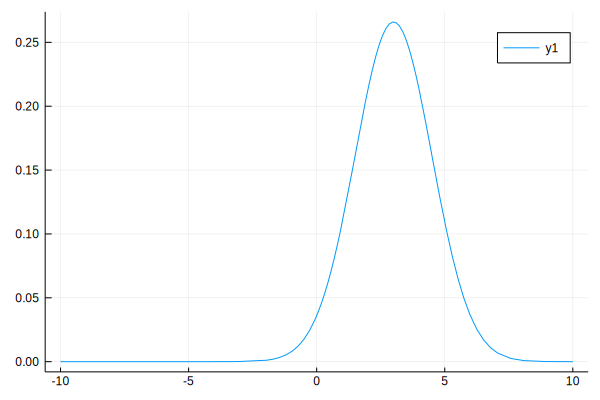

In [36]:
plot(true_d, -10, 10)

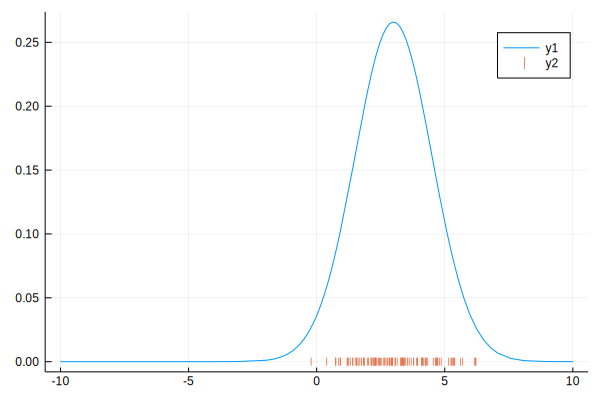

In [37]:
dat = rand(true_d, 100)
plot!(dat, zeros(size(dat)), seriestype=:scatter, markershape=:vline)

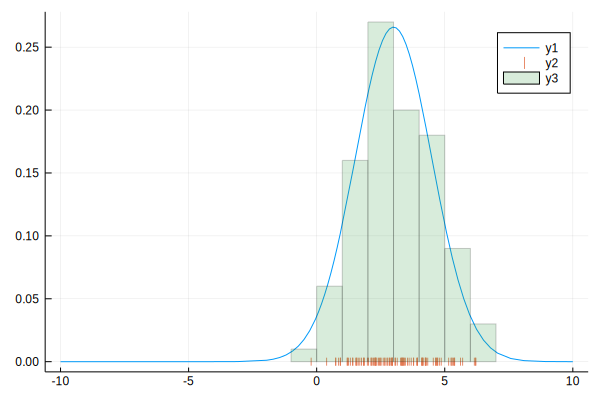

In [38]:
plot!(dat, seriestype=:histogram, normalize=true, alpha=0.2)

In [ ]:
prior = NormalInverseChisq(0., 1., 1., 1.)
post = posterior(prior, Normal, dat)

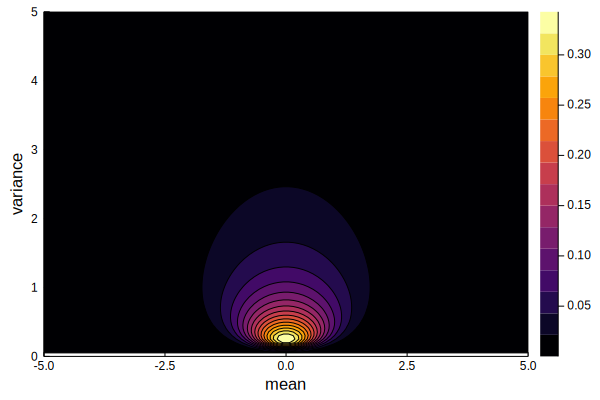

In [109]:
μs, σ2s = range(-5, 5, length=100), range(0, 5, length=100)

plot(μs, σ2s, (μ, σ2) -> pdf(prior, μ, σ2), xlabel="mean", ylabel="variance", seriestype=[:contourf])

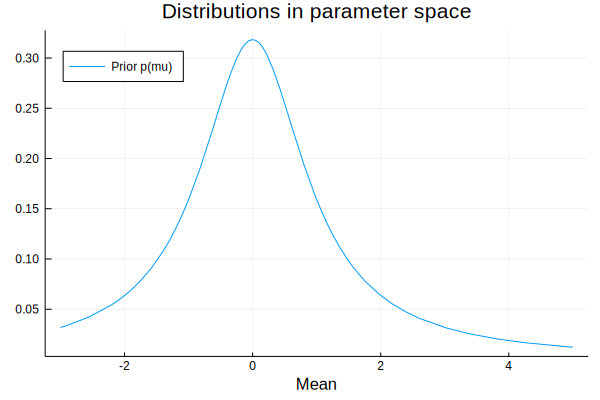

In [162]:
plot(marginal_mean(prior), -3, 5, label="Prior p(mu)", legend=:topleft, title="Distributions in parameter space", xlabel="Mean")

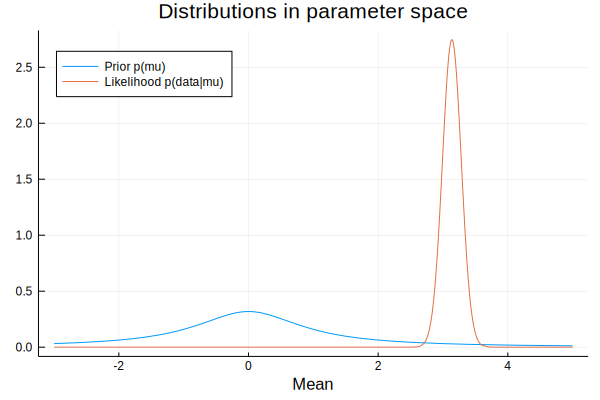

In [163]:
plot!(Normal(mean(dat), sqrt(var(dat)/(length(dat)-1))), -3, 5, label="Likelihood p(data|mu)")

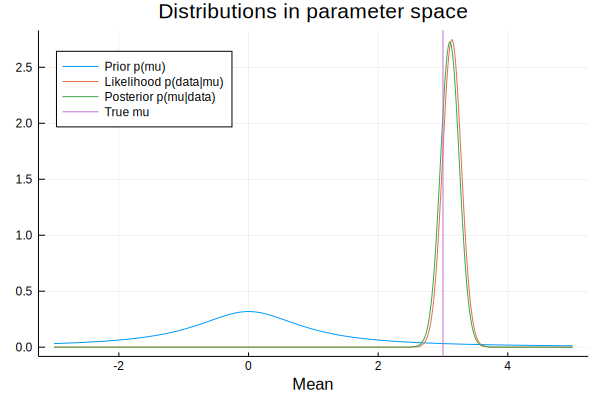

In [164]:
plot!(marginal_mean(post), -3, 5, label="Posterior p(mu|data)")
plot!([mean(true_d)], seriestype=:vline, label="True mu")

# Distributions in data space

We call these "predictive distributions" because they're the predictions we'd make about new data based on the prior or posterior.

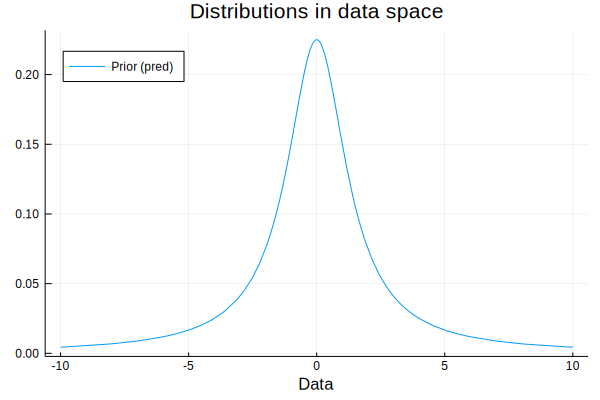

In [165]:
plot(predictive(prior), -10, 10, label="Prior (pred)", legend=:topleft, title="Distributions in data space", xlabel="Data")

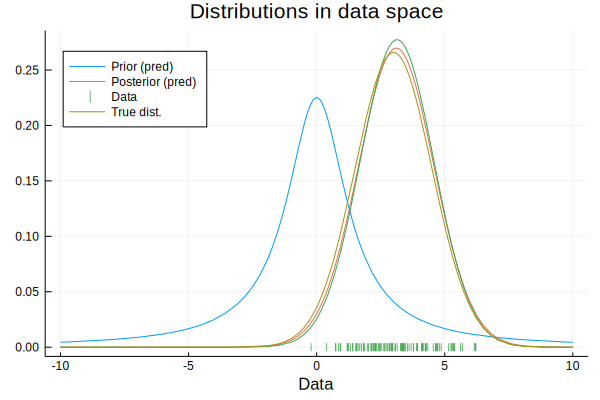

In [119]:
plot!(predictive(post), -10, 10, label="Posterior (pred)")
scatter!(dat, zeros(size(dat)), markershape=:vline, label="Data", color=3)
plot!(fit(Normal, dat), -10, 10, label="", color=3)
plot!(true_d, -10, 10, label="True dist.")

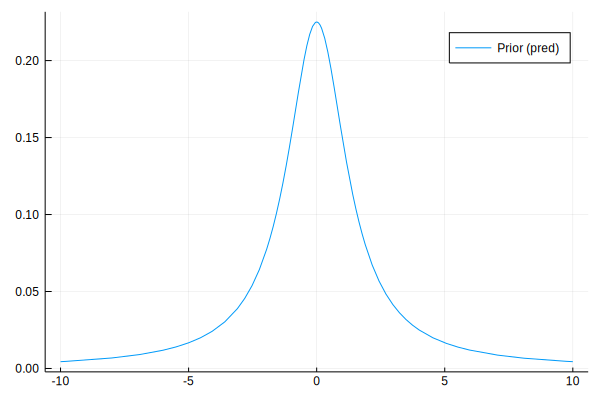

In [177]:
prior_plot = plot(predictive(prior), -10, 10, label="Prior (pred)")

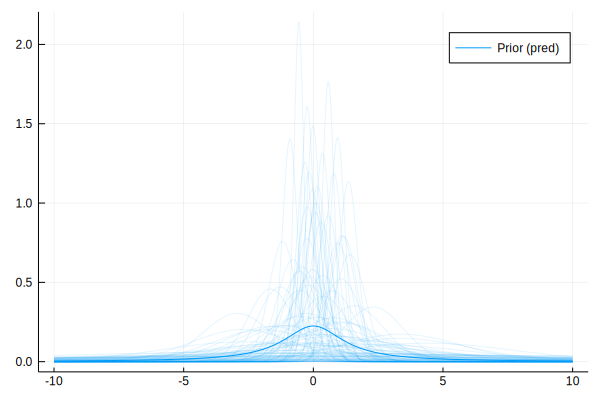

In [178]:
prior_samples = [Normal(rand(prior)...) for _ in 1:100]

map(prior_samples) do samp
    plot!(prior_plot, samp, -10, 10, alpha=0.1, color=1, label="")
end
prior_plot

In [185]:
post_weights = [sum(logpdf.(dist, dat)) for dist in prior_samples]
post_weights .-= StatsFuns.logsumexp(post_weights)

100-element Array{Float64,1}:
 -1130.6814389603878  
 -1522.6100145785633  
   -50.902624356734634
  -156.4068756956221  
   -84.28958766139777 
  -828.1661056094379  
  -770.740960632569   
  -326.8040773361421  
  -104.63959774752101 
  -588.9495021282206  
 -1059.3647366087516  
   -56.22857062488495 
   -34.99659420135748 
     ⋮                
  -200.4009287763987  
 -5608.790944294593   
  -296.10591042061867 
 -2271.3743196300065  
  -109.61285336159949 
  -441.41450046605667 
   -56.75264237116801 
  -381.44908937140724 
 -2110.7553357774814  
  -293.577942822739   
   -10.91609002054608 
 -5107.598093776854   

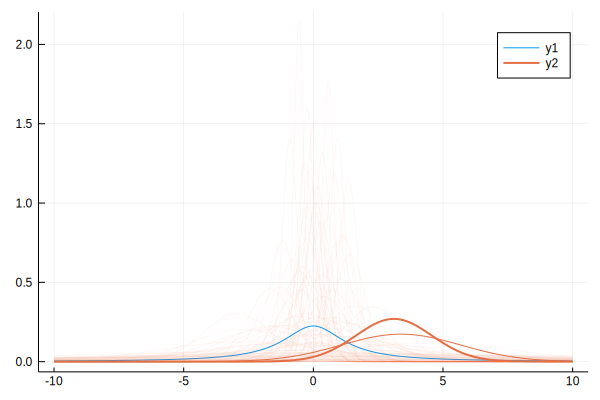

In [194]:
post_plot= plot(predictive(prior), -10, 10)
plot!(post_plot, predictive(post), -10, 10, width=2)
map(prior_samples, post_weights) do dist, w
    plot!(post_plot, dist, -10, 10, color=2, alpha=exp(w - maximum(post_weights)) + 0.05, label="")
end
post_plot

In [ ]:
Statsf